### Importing modules

In [2]:
import numpy as np
import math as m
import random as r
import matplotlib as mpl
import matplotlib.pyplot as plt

# Numerical evaluation of $\pi$ (approximated)

### Algorithm
We need to find the area spanned by a circle in a square with unitray radius. The value of $\pi$ will be $\pi = 4\frac{\pi}{4}$, that is four times the number of points in the box divided the number of points in the square. The points ar random generated.

In [3]:
positions = []  # positions of points
pos_C = []  # only points in the circle
greek_pi = [] # list with diffferent approximations of pi
sigma_pi = [] # list with diffferent relative errors with respect to the real value of pi

N = (int(1e3), int(1e4), int(1e5), int(1e6))

def Clear(a,b):
  a.clear()
  b.clear()

def Print(n , val, s):
  print("per N=",n, "il valore di pi greco è", val, "+/-", s )

print("The real value of $\pi$ is:", m.pi)

for k,j in enumerate(N):
  
  # generation of position
  positions = [ (np.random.uniform(-1.0,1.0),np.random.uniform(-1.0,1.0) ) for i in range(0,j,1)]
  x = list(list(zip(*positions))[0])
  y = list(list(zip(*positions))[1])
  
  # checking if points are (or not) in the cirlce
  pos_C = [ (a,b) for a,b in positions if a*a + b*b <= 1]
  circle_x = list(list(zip(*pos_C))[0])
  circle_y = list(list(zip(*pos_C))[1])
  
  pos_notInC = set(positions) - set(pos_C)
  notInC_x = list(list(zip(*pos_notInC))[0])
  notInC_y = list(list(zip(*pos_notInC))[1])
  
  # evaluation of pi and relative errors
  g_pi=4*len(pos_C)/j
  s_pi=abs((g_pi - np.pi))/np.pi
  greek_pi.append(g_pi)
  sigma_pi.append(s_pi)
  
  # printing function
  Print(j,g_pi,s_pi)
  
  # clearing tuples
  Clear(positions,pos_C)

The real value of $\pi$ is: 3.141592653589793
per N= 1000 il valore di pi greco è 3.112 +/- 0.00941963419604336
per N= 10000 il valore di pi greco è 3.1556 +/- 0.00445867684156994
per N= 100000 il valore di pi greco è 3.14308 +/- 0.00047343706654878276
per N= 1000000 il valore di pi greco è 3.14432 +/- 0.0008681413254167246


### Plotting results

No handles with labels found to put in legend.


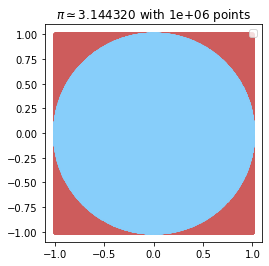

In [4]:
%matplotlib inline
plt.axis('square')
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.title("$\pi\simeq${0:.6f} with {1:g} points".format(greek_pi[-1], N[-1]))
plt.plot(notInC_x, notInC_y, color='indianred', ls='', marker='.')
plt.plot(circle_x, circle_y, color='lightskyblue', ls='', marker='.')
plt.legend(loc='best')

# Kniffel - Yahtzee game
## Version 1
### Rules:

Each player can roll five dice. Possibilities:
- Scale: 12345 or 23456
- Full: combination of three identical numbers and other two (e.g. 33366)
- Tris: three identical numbers
- Poker: four identical numbers
- Kniffel: five identical numbers

In [31]:
# dictionary containing type of victories
possibilities = {0:'nothing',1:'scale',2:'full',3:'tris',4:'poker',5:'kniffel'}
histo= []

# this function has in input v = sorted list of entries, vect = number of victories
def special(v,vect):
  a = 0 # counter: it is != 0 if we don't have a scale
  w = 0
  idx = 0
  while idx<4:
    if( v[idx] + 1 != v[idx+1] ):
      a += 1
    idx += 1
  if (a == 0):
    w = 1
  elif( v.count(v[0]) == 5 ):
    w = 5
  elif( v.count(v[2]) == 4 ):
    w = 4
  elif( v.count(v[2]) == 3 ):
    if( v.count(v[0]) == 2 or v.count(v[4]) == 2 ):
      w = 2
    else:
      w = 3
  if w != 0:
    vect[w-1] += 1

for i in range(0,10000,1):
  
  number_of_victories = [0,0,0,0,0]
  c=0
  
  while number_of_victories.count(0) != 0:
    roll = [r.randrange(1,6) for i in range(5)]
    special(sorted(roll), number_of_victories)
    roll.clear()
    c += 1
  histo.append(c)

(array([1.835e+03, 1.511e+03, 1.188e+03, 1.054e+03, 7.980e+02, 6.540e+02,
        5.230e+02, 4.320e+02, 3.440e+02, 3.110e+02, 2.460e+02, 1.670e+02,
        1.750e+02, 1.380e+02, 1.230e+02, 7.800e+01, 7.800e+01, 5.500e+01,
        6.500e+01, 4.200e+01, 3.300e+01, 1.600e+01, 2.700e+01, 1.900e+01,
        1.200e+01, 1.200e+01, 1.300e+01, 1.300e+01, 7.000e+00, 7.000e+00,
        7.000e+00, 3.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 4.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([   8.  ,  131.14,  254.28,  377.42,  500.56,  623.7 ,  746.84,
         869.98,  993.12, 1116.26, 1239.4 , 1362.54, 1485.68, 1608.82,
        1731.96, 1855.1 , 1978.24, 2101.38, 2224.52, 2347.66, 2470.8 ,
        2593.94, 2717.08, 2840.22, 2963.36, 3086.5 , 3209.64, 3332.78,
        3455.92, 3579.06, 3702.2 , 3825.34, 3948.48, 4071.62, 4194.76,
        4317.9 , 4441

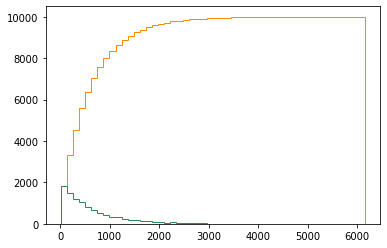

In [65]:
%matplotlib inline 
plt.hist(histo, 50, histtype = 'step', cumulative = True, color = 'darkorange')
plt.hist(histo, 50, histtype = 'step', color = 'seagreen')

# Kniffel -  Yahtzee game
## Version 2

Dictionary containing type of victories:


In [32]:
all_events = {'ks': "Kleine strasse",
              'gs': "Grosse strasse",
              'kn': "Kniffel",
              'fh': "Full house",
              '4k': "Viererpatsch",
              '3k': "Dreierpatsch"}


function definitons

In [33]:

# function of random roll
def kniffel_roll():
    hand = [r.choice((1, 2, 3, 4, 5, 6)) for i in range(5)]
    return hand

# this function check the type of victory of a signeìle hand
def check_score(hand):
    
    counts = [hand.count(n) for n in set(hand)]
    counts.sort()
 
    event = None   

    if counts == [1, 1, 3]:
        event = '3k'
    elif counts == [2, 3]:
        event = 'fh'
    elif counts == [1, 4]:
        event = '4k'
    elif len(counts) == 1:
        event = 'kn'
    elif sorted(hand) == [1, 2, 3, 4, 5]:
        event = 'ks'
    elif sorted(hand) == [2, 3, 4, 5, 6]:
        event = 'gs'

    return event

def update_remaining_events(event, remaining_events):
    remaining_events.pop(event, None)
    
def event_info(event, hand, remaining_events, all_events):
    if event is not None:
        try:
            print("{0}!".format(remaining_events[event]), hand)
        except:
            print("Too bad, you already scored a {0} previously!".format(all_events[event].lower()), hand)
    else:
        print("Better luck next time...", hand)  

Implementation of the code:

In [35]:
N_games = 0
all_rolls = []
Total_games = int(1e3)

while N_games < Total_games:
    remaining_events = dict(all_events)
    rolls = 0

    while len(remaining_events):
        rolls += 1
        hand = kniffel_roll()
        event = check_score(hand)
        #event_info(event, hand, remaining_events, all_events)
        update_remaining_events(event, remaining_events)
    
    N_games += 1
    all_rolls.append(rolls)

Plotting the distribution of the total rolls over the simulated games

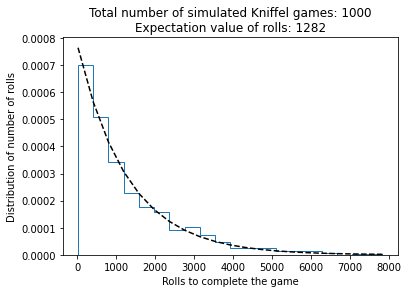

In [66]:
lam = 0.78e-3 # Poisson distribution: the expectation value for the number of rolls is 1/lam
y = []

plt.xlabel("Rolls to complete the game")
plt.ylabel("Distribution of number of rolls")
plt.title("Total number of simulated Kniffel games: {0}\nExpectation value of rolls: {1:.0f}".format(Total_games, 1/lam))
n, bins, patches = plt.hist(all_rolls, bins=20, density=True, log=False, histtype='step')

for b in bins:
    y.append(lam * m.exp(-lam*b))

plt.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')

Cumulative

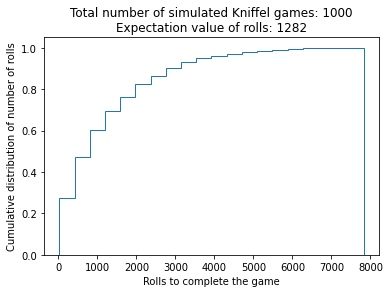

In [54]:
plt.xlabel("Rolls to complete the game")
plt.ylabel("Cumulative distribution of number of rolls")
plt.title("Total number of simulated Kniffel games: {0}\nExpectation value of rolls: {1:.0f}".format(Total_games, 1/lam))
n, bins, patches = plt.hist(all_rolls, bins=20, histtype='step', density=True, log=False, cumulative=True)